In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))

C:\Users\kumchand0\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'C:/Users/kumchand0/MyDrive/Learning/Kaggle/Data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [5]:
def extract_features(directory, sample_count):
 features = np.zeros(shape=(sample_count, 4, 4, 512))
 labels = np.zeros(shape=(sample_count))
 generator = datagen.flow_from_directory(
  directory,
  target_size=(150, 150),
  batch_size=batch_size,
  class_mode='binary')
 i = 0
 for inputs_batch, labels_batch in generator:
  features_batch = conv_base.predict(inputs_batch)
  features[i * batch_size : (i + 1) * batch_size] = features_batch
  labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  i += 1
  if i * batch_size >= sample_count:
   break
 return features, labels

In [6]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [8]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
 loss='binary_crossentropy',
 metrics=['acc'])

In [10]:
history = model.fit(train_features, train_labels,
 epochs=30,
 batch_size=20,
 validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6045 - acc: 0.6660 - val_loss: 0.4544 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4295 - acc: 0.8115 - val_loss: 0.3688 - val_acc: 0.8690
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3571 - acc: 0.8555 - val_loss: 0.3299 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.3192 - acc: 0.8710 - val_loss: 0.3028 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2890 - acc: 0.8825 - val_loss: 0.2876 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2721 - acc: 0.8925 - val_loss: 0.2758 - val_acc: 0.8920
Epoch 7/30
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2507 - acc: 0.9020 - val_loss: 0.2810 - val_acc: 0.8750
Epoch 8/30
200

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=2e-5),
 metrics=['acc'])

In [17]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=1,
 validation_data=validation_generator,
 validation_steps=50)

Epoch 1/1
100/100 [==============================] - 914s 9s/step - loss: 0.5920 - acc: 0.6770 - val_loss: 0.4737 - val_acc: 0.7870


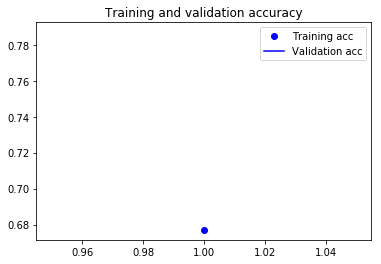

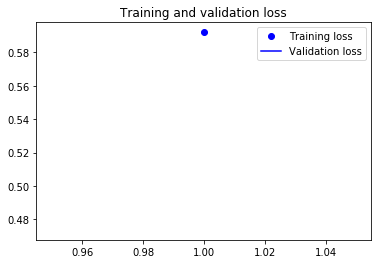

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [20]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
 if layer.name == 'block5_conv1':
  set_trainable = True
 if set_trainable:
  layer.trainable = True
 else:
  layer.trainable = False

In [21]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-5),
 metrics=['acc'])

In [22]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=1,
 validation_data=validation_generator,
 validation_steps=50)

Epoch 1/1
100/100 [==============================] - 1076s 11s/step - loss: 0.4293 - acc: 0.8100 - val_loss: 0.2742 - val_acc: 0.8850


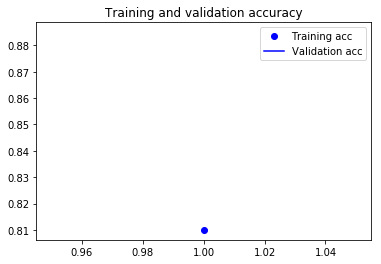

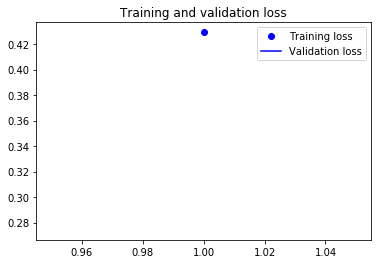

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
def smooth_curve(points, factor=0.8):
 smoothed_points = []
 for point in points:
  if smoothed_points:
   previous = smoothed_points[-1]
   smoothed_points.append(previous * factor + point * (1 - factor))
  else:
   smoothed_points.append(point)
 return smoothed_points

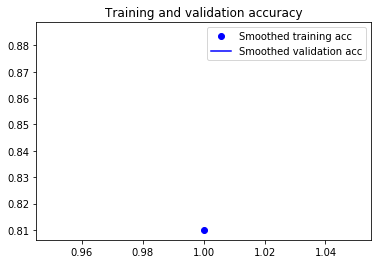

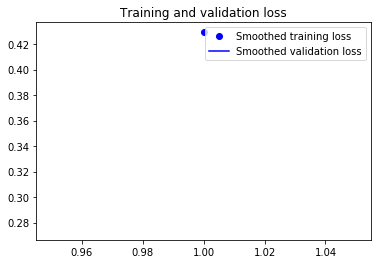

In [25]:
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8759999907016754
